In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Definir os caminhos para as pastas de treino e teste
caminho_base = 'SOUVIK/'
caminho_treino = caminho_base + 'train/'
caminho_teste = caminho_base + 'test/'


In [3]:

IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# 1. Gerador para os dados de TREINO com Data Augmentation
train_image_generator = ImageDataGenerator(
    rescale=1./255,             # Normaliza os pixels para o intervalo [0, 1]
    rotation_range=45,          # Rotaciona a imagem aleatoriamente em até 45 graus
    width_shift_range=0.2,      # Desloca a imagem na horizontal
    height_shift_range=0.2,     # Desloca a imagem na vertical
    shear_range=0.2,            # Aplica distorções (cisalhamento)
    zoom_range=0.2,             # Aplica zoom aleatório
    horizontal_flip=True,       # Inverte a imagem horizontalmente
    fill_mode='nearest'
)



In [4]:
# 2. Gerador para os dados de TESTE (APENAS normalização)
test_image_generator = ImageDataGenerator(rescale=1./255)

# 3. Carregar as imagens dos diretórios usando os geradores
train_data_gen = train_image_generator.flow_from_directory(
    directory=caminho_treino,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary' # Porque temos duas classes (plastic, no-plastic)
)

test_data_gen = test_image_generator.flow_from_directory(
    directory=caminho_teste,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1830 images belonging to 2 classes.
Found 489 images belonging to 2 classes.


In [14]:
modelo = Sequential([
    Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # saída binária
])


c:\Users\jambi\OneDrive\Documentos\repositorios-git\sptech\TCC\machine-learning\cnn-v3\venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [15]:
modelo.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Definir o número de épocas
EPOCHS = 100

# Calcular o número de passos por época
# Total de amostras / Tamanho do lote
steps_per_epoch = train_data_gen.samples // BATCH_SIZE
validation_steps = test_data_gen.samples // BATCH_SIZE

# Treinar o modelo
history = modelo.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=test_data_gen,
    validation_steps=validation_steps
)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 49s 855ms/step - accuracy: 0.6479 - loss: 0.7086 - val_accuracy: 0.7167 - val_loss: 0.5808
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.5000 - loss: 0.7242 - val_accuracy: 0.7146 - val_loss: 0.5729
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 751ms/step - accuracy: 0.7236 - loss: 0.5420 - val_accuracy: 0.6938 - val_loss: 0.5712
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.8438 - loss: 0.4978 - val_accuracy: 0.6979 - val_loss: 0.5628
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 754ms/step - accuracy: 0.7486 - loss: 0.5016 - val_accuracy: 0.5437 - val_loss: 0.8301
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.6250 - loss: 0.5621 - val_accuracy: 0.5354 - val_loss: 0.8143
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 720ms/step - accuracy: 0.7314 - loss: 0.5403 - val_accuracy: 0.6875 - val_loss: 0.6146
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.6562 - loss: 0.6903 - 

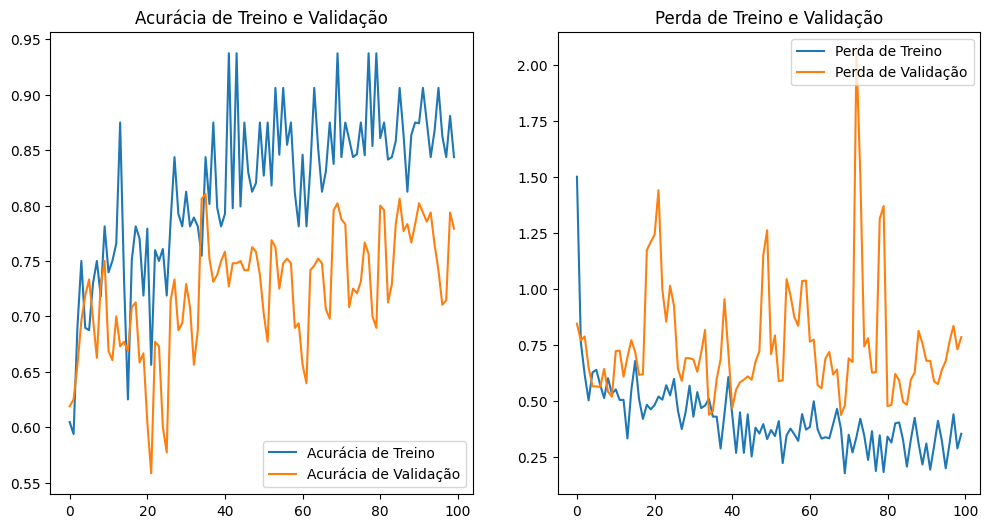

In [22]:
# Pegar os resultados do histórico de treinamento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

In [ ]:
modelo.save("modelo_cnn_imagens_de_fora2_leaky100epchs.keras")

In [18]:
modelo_elu = Sequential([
    Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    ELU(alpha=1.0),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3)),
    ELU(alpha=1.0),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3)),
    ELU(alpha=1.0),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512),
    ELU(alpha=1.0),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # saída binária
])


In [19]:
modelo_elu.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# Definir o número de épocas
EPOCHS = 100

# Calcular o número de passos por época
# Total de amostras / Tamanho do lote
steps_per_epoch = train_data_gen.samples // BATCH_SIZE
validation_steps = test_data_gen.samples // BATCH_SIZE

# Treinar o modelo
history = modelo_elu.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=test_data_gen,
    validation_steps=validation_steps
)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 46s 791ms/step - accuracy: 0.6046 - loss: 1.5005 - val_accuracy: 0.6187 - val_loss: 0.8437
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.5938 - loss: 0.7599 - val_accuracy: 0.6250 - val_loss: 0.7693
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 763ms/step - accuracy: 0.6908 - loss: 0.6151 - val_accuracy: 0.6562 - val_loss: 0.7862
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.7500 - loss: 0.5010 - val_accuracy: 0.6958 - val_loss: 0.6479
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 716ms/step - accuracy: 0.6897 - loss: 0.6256 - val_accuracy: 0.7188 - val_loss: 0.5636
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.6875 - loss: 0.6376 - val_accuracy: 0.7333 - val_loss: 0.5633
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 728ms/step - accuracy: 0.7297 - loss: 0.5692 - val_accuracy: 0.6979 - val_loss: 0.5610
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.7500 - loss: 0.5115 - 

In [21]:
modelo.save("modelo_cnn_imagens_de_fora_elu100epchs.keras")

In [11]:


from tensorflow.keras.preprocessing import image

# Carregar a imagem
caminho_imagem = 'trash7.png'
img = image.load_img(caminho_imagem, target_size=(IMG_HEIGHT, IMG_WIDTH))

# Converter a imagem para um array numpy
img_array = image.img_to_array(img)

# Expandir as dimensões para corresponder ao formato de entrada do modelo (lote de 1)
img_batch = np.expand_dims(img_array, axis=0)

# Normalizar a imagem
img_preprocessed = img_batch / 255.0

# Fazer a previsão
prediction = modelo.predict(img_preprocessed)

# Interpretar o resultado
print(f"Probabilidade Bruta: {prediction[0][0]}")

if prediction[0][0] > 0.5:
    print("Previsão: Plástico")
else:
    print("Previsão: Não-Plástico")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Probabilidade Bruta: 0.999988317489624
Previsão: Plástico
